<a href="https://colab.research.google.com/github/BrianTruong23/credit_card_fraud_detection/blob/main/CreditFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Fraud Detection

Higher Workflow Overview:
- 1) Importing dataset using PySpark
- 2) Understand data using SQL commands
- 3) Data Pre-processing
- 4) Data Visualization
- 5) Data Modeling
- 6) Data Evaluation

• Trained 3 machine learning models attaining __%+ accuracy detecting fraudulent credit card transactions from __MB of data
• Outperformed the initially trained baseline models’ precision, recall, and f1 score by _% using data balancing methods
• The best performing Random Forest model identified __+ fraudulent transactions, saving customers a total of $_ million


Model training & testing
Firstly, we'll use 70% of our dataset for training and the remaining 30% for testing.

After exploring our dataset, we noticed that our dataset was extremely imbalanced, where non-fraudulent transactions were about 91% of the data. So, we decided to resample the data using 4 techniques

Random Undersampling
Random Oversampling
SMOTE Oversampling

We also have a baseline/control trainng dataset that is left untouched (i.e., not applying any resampling methods).

For the machine learning models, we'll use , Random Forest, Logistic Regression and Neural Networks (MLP). After training the models, we use our test data to obtain the model metrics such as accuracy score and precision/recall/f1 scores. We also visualize our results by plotting confidence score confusion matrices.

What do I want to write in my resume
- 3 ML models with __accuracy score from __MB of data
- Data balancing methods outperform by how many percentage?
- identified how many fraud cases and saved how much money?
- Use PySpark for handling data?

## Data Importing Using PySpark

In this project, we use a considerably large dataset (150.8MB), therefore, we use PySpark to optimize loading and processing of the dataset.

### Some benefits of using PySpark
- Distributed Processing: the PySpark library leverages the power of Apache Spark for distributed processing to process data parallely across different unit.
- Scalibility: PySpark can seamlessly handle small dataset on a single machine to massive dataset across multiple processing units.
- Performance Optimization: PySpark performs a lot of data planning and execution to opimize the data processing. It pushes down a lot of data movements, effectively processing data at a much faster rate for big files.



In [5]:
# Import PySpark. If it does have PySpark installed, install it and create session for credit fraud detection
# Create a SparkSession:
try:
  import pyspark
  from pyspark.sql import SparkSession
  spark = SparkSession.builder.appName("credit_card_fraud_detection").getOrCreate()
except:
  !pip install pyspark
  import pyspark
  from pyspark.sql import SparkSession
  spark = SparkSession.builder.appName("credit_card_fraud_detection").getOrCreate()


In [6]:
# Load CSV as PySpark DataFrame:
df = spark.read.csv('creditcard.csv', header=True, inferSchema=True)

In [7]:
# Register DataFrame as SQL Table:
df.createOrReplaceTempView("credit_card_fraud_table")

In [8]:
# Perform SQL Queries:

result = spark.sql("SELECT * FROM credit_card_fraud_table WHERE amount > 100")
result.show()

+----+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+--------------------+-------------------+-------+-----+
|Time|                V1|                 V2|                 V3|                V4|                 V5|                V6|                V7|                V8|                 V9|                V10|                V11|                V12|               V13|               V14|               V15|                V16|               V17|               V18|                 V19|                 V20|                V21|           

In [9]:
# Analyzing and Visualizing:
# Example: Show summary statistics
df.describe().show()

+-------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+
|summary|              Time|                  V1|                  V2|                  V3|                  V4|                  V5|                  V6|                  V7|                  V8|                  V9|                 V10|                 V11|                 V12|                 V13|                 V14|                 V15|

## Understanding data with SQL commands

Answer some  questions relating to the dataset
- Q1: What is the total number of transactions in the dataset?
- Q2: What is the average amount in the class 0 (non-fraudulent transactions)?
- Q3: What is the average amount in the class 1 (fraudulent transactions)?
- Q4: How many transactions that has the total amount more than the average of the dataset?



In [10]:
# Q1: What is the total number of transactions in the dataset?
# There are 284807 transactions.
result = spark.sql("SELECT COUNT (*) FROM credit_card_fraud_table")
result.show()

+--------+
|count(1)|
+--------+
|  284807|
+--------+



In [11]:
# Q2: What is the average amount in the class 0 (non-fraudulent transactions)?
# 88.29
result = spark.sql("SELECT AVG(AMOUNT) FROM credit_card_fraud_table WHERE Class = 0")
result.show()

+-----------------+
|      avg(AMOUNT)|
+-----------------+
|88.29102242233286|
+-----------------+



In [12]:
# Q3: What is the average amount in the class 1 (fraudulent transactions)?
# 122.2
result = spark.sql("SELECT AVG(AMOUNT) FROM credit_card_fraud_table WHERE Class = 1")
result.show()

+------------------+
|       avg(AMOUNT)|
+------------------+
|122.21132113821136|
+------------------+



In [15]:
# Q4: How many transactions that has the total amount more than the average of the dataset?
# 64407
result = spark.sql("""

  SELECT COUNT(*)

  FROM credit_card_fraud_table

  WHERE Amount > (
     SELECT AVG(Amount)
     FROM credit_card_fraud_table
  )

""")
result.show()

+--------+
|count(1)|
+--------+
|   64407|
+--------+



## Data Pre-processing

- Checking for null values
- Eliminate null values if existed

In [2]:
import pandas as pd

# Convert df from pyspark.sql.dataframe.DataFrame to Pandas dataframe
# pandas_df = df.toPandas()

# Read csv files as Pandas
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv', error_bad_lines=False)


<ipython-input-2-1661667dde8f>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  credit_card_data = pd.read_csv('creditcard.csv', error_bad_lines=False)


In [3]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105062,69348,1.255690,-1.393540,0.692738,-1.289430,-1.682706,-0.276840,-1.136732,-0.076399,-1.738348,...,0.039513,0.368717,-0.072065,0.106986,0.257991,-0.087901,0.054217,0.043817,116.00,0.0
105063,69349,-1.250199,0.123183,1.051709,-0.236427,1.611834,0.284241,0.288190,0.303990,-0.430526,...,0.034681,-0.039897,-0.049460,-1.399614,0.217418,-0.496523,-0.042176,0.161224,3.99,0.0
105064,69349,-1.925153,-0.140133,2.456659,0.148112,-0.284164,-0.150520,-1.129736,1.003991,-0.218409,...,0.447094,0.895815,-0.233737,0.262490,0.050375,0.515140,0.207773,-0.090777,4.69,0.0
105065,69349,1.277856,-0.027651,0.249167,0.697814,-0.232188,-0.118324,-0.145313,-0.048568,0.677505,...,-0.141950,-0.164073,-0.194695,-0.381716,0.696330,0.489582,-0.017759,0.002991,10.00,0.0


In [18]:

credit_card_data.dropna(inplace = True)

# checking the number of missing values in each column
credit_card_data.isnull().sum()

# There is some missing values in some of the versions


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    104834
1.0       232
Name: Class, dtype: int64

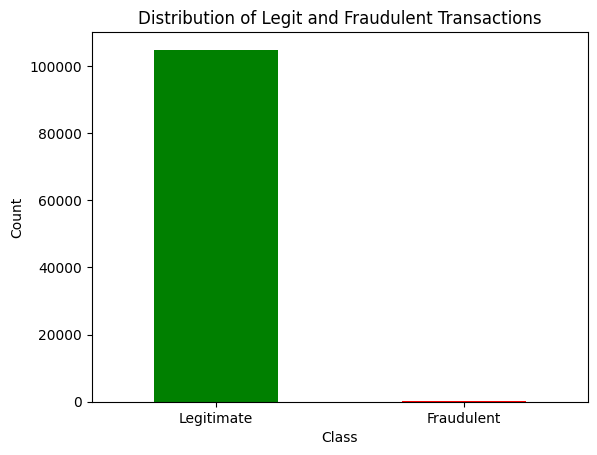

In [21]:

import matplotlib.pyplot as plt

# Assuming 'credit_card_data' is your Pandas DataFrame
class_counts = credit_card_data['Class'].value_counts()

# Plotting the bar graph
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Legit and Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Legitimate', 'Fraudulent'], rotation=0)
plt.show()



### Insights: The dataset is highly imbalanced with the majority of the class is not fraudulent. This means that we need to perform some special techniques to overcome this imbalance in the dataset.
Class
- 0 -> Not fraudulent:  284315
- 1 -> Fraudulent: 492
- -> The non-fraudulent cases make up 99.8% of the dataset


### Data balancing method:

Because of the prevalence of one class than the other, I will implement some data balancing techniques to overcome this imbalance of the dataset. Some techniques that I will use include Random Undersampling, NearMiss Undersampling and SMOTE Oversampling.


In [22]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [23]:
# Get some descriptions of the data
legit.Amount.describe()

count    104834.000000
mean         96.584297
std         262.333583
min           0.000000
25%           7.190000
50%          25.540000
75%          87.440000
max       19656.530000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count     232.000000
mean      115.520474
std       253.721393
min         0.000000
25%         1.000000
50%         7.595000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [25]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,43692.851508,-0.245296,-0.039251,0.702486,0.146715,-0.274535,0.102607,-0.102664,0.053767,-0.044415,...,0.043860,-0.032987,-0.104940,-0.037011,0.010118,0.133410,0.025912,0.000488,0.001663,96.584297
1.0,37898.655172,-6.138432,4.280104,-7.850475,4.800030,-4.349687,-1.566011,-6.505922,1.640373,-2.788880,...,0.237631,1.386881,-0.351377,-0.114210,-0.118153,0.208771,0.094034,0.536235,0.061592,115.520474


#### Random Undersampling

- Build a sample dataset that has the normal distribution of fraudulent and non-fraudulent
- Therefore, I will sample the number of fraudulent transactions to be equal to the number of non-fraudulent transanctions.

In [26]:
!pip install imbalanced-learn


In [27]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix, 'y' is your labels, and 'credit_card_data' is your DataFrame
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the training data
X_train_random, y_train_random = rus.fit_resample(X_train, y_train)

# Concatenate the resampled data back into a DataFrame if needed
resampled_data_random = pd.concat([pd.DataFrame(X_train_random, columns=X_train.columns),
                            pd.DataFrame(y_train_random, columns=['Class'])],
                           axis=1)

# Now 'X_train_resampled' and 'y_train_resampled' contain the undersampled data


#### NearMiss Undersampling

In [28]:
from imblearn.under_sampling import NearMiss
import pandas as pd
from sklearn.model_selection import train_test_split

# Create a NearMiss undersampler
nm = NearMiss(version=2)

# Fit and transform the training data
X_train_nearmiss, y_train_nearmiss = nm.fit_resample(X_train, y_train)

# Concatenate the resampled data back into a DataFrame if needed
resampled_data_nearmiss = pd.concat([pd.DataFrame(X_train_nearmiss, columns=X_train.columns),
                            pd.DataFrame(y_train_nearmiss, columns=['Class'])],
                           axis=1)

# Now 'X_train_resampled' and 'y_train_resampled' contain the NearMiss undersampled data


#### SMOTE Oversampling

In [29]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

# Create a SMOTE oversampler
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Concatenate the resampled data back into a DataFrame if needed
resampled_data_smote = pd.concat([pd.DataFrame(X_train_smote, columns=X_train.columns),
                            pd.DataFrame(y_train_smote, columns=['Class'])],
                           axis=1)

# Now 'X_train_resampled' and 'y_train_resampled' contain the SMOTE oversampled data


## Splitting the data into Features & Targets

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Model Training

I will use three models for testing:
- Neural Network
- Logistic Regression
- Random Forest

For each of the model, I will test three databalancing method and compare to the original data without any balancing.

- Logistic Regression

In [36]:


data_balancing_method = [["original",X_train, y_train], ["Random Undersampling", X_train_random, y_train_random], ["nearmiss", X_train_nearmiss, y_train_nearmiss], ["smote", X_train_smote, y_train_smote]]
# Write a function to take in X_train and y_train from the three data balancing methods and orignial method for three models
# Print out the accuracy, f1-score and precision score and compare with each other to see which model perform the best

def model_training(model, name, X_train_func, y_train_func, X_test_func, y_test_func):

  # Fit the model to the training data
  model.fit(X_train_func, y_train_func)

  # Make predictions on the test set
  y_pred = model.predict(X_test_func)

  # Evaluate the model performance
  accuracy = accuracy_score(y_test_func, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)

  print(name)
  print(accuracy)
  print(conf_matrix)
  print(class_report)

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter= 500, random_state=42)

for data in data_balancing_method:
  model_training(logistic_model, *data, X_test_func=X_test, y_test_func=y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


original
0.9989054915770439
[[20963     5]
 [   18    28]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20968
         1.0       0.85      0.61      0.71        46

    accuracy                           1.00     21014
   macro avg       0.92      0.80      0.85     21014
weighted avg       1.00      1.00      1.00     21014

Random Undersampling
0.95236508994004
[[19969   999]
 [    2    44]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98     20968
         1.0       0.04      0.96      0.08        46

    accuracy                           0.95     21014
   macro avg       0.52      0.95      0.53     21014
weighted avg       1.00      0.95      0.97     21014

nearmiss
0.8900256971542782
[[18661  2307]
 [    4    42]]
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     20968
         1.0       0.02      0.91      0.04       

- Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model
n_estimators=100
max_depth=None
random_forest_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

for data in data_balancing_method:
  model_training(random_forest_model, *data, X_test_func=X_test, y_test_func=y_test)


original
0.9995241267726278
[[20967     1]
 [    9    37]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20968
         1.0       0.97      0.80      0.88        46

    accuracy                           1.00     21014
   macro avg       0.99      0.90      0.94     21014
weighted avg       1.00      1.00      1.00     21014

Random Undersampling
0.9639763966879223
[[20217   751]
 [    6    40]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     20968
         1.0       0.05      0.87      0.10        46

    accuracy                           0.96     21014
   macro avg       0.53      0.92      0.54     21014
weighted avg       1.00      0.96      0.98     21014

nearmiss
0.3255448748453412
[[ 6798 14170]
 [    3    43]]
              precision    recall  f1-score   support

         0.0       1.00      0.32      0.49     20968
         1.0       0.00      0.93      0.01     

- Neural Network

In [39]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes=(100,)
max_iter=200
# Create a Neural Network model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)


# Loop through each data balancing method and train neural network model
for data in data_balancing_method:
    model_training(neural_network_model, *data, X_test_func=X_test, y_test_func=y_test)

original
0.9980965070905111
[[20968     0]
 [   40     6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20968
         1.0       1.00      0.13      0.23        46

    accuracy                           1.00     21014
   macro avg       1.00      0.57      0.61     21014
weighted avg       1.00      1.00      1.00     21014

Random Undersampling
0.9871038355382126
[[20728   240]
 [   31    15]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     20968
         1.0       0.06      0.33      0.10        46

    accuracy                           0.99     21014
   macro avg       0.53      0.66      0.55     21014
weighted avg       1.00      0.99      0.99     21014

nearmiss
0.0038069858189778245
[[   34 20934]
 [    0    46]]
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00     20968
         1.0       0.00      1.00      0.00  

## Model Evaluation



### **Logistic Regression**

#### - Results and Observations

- **Original Data:**
  - Accuracy: 0.9989
  - Precision (Class 1): 0.85
  - Recall (Class 1): 0.61
  - F1-Score (Class 1): 0.71
  
  **Interesting Observation:**
  The original data achieved extremely high accuracy, but the precision and recall for detecting fraudulent transactions (Class 1) are relatively lower. This indicates that the model may not perform well in identifying actual fraud cases.

- **Random Undersampling:**
  - Accuracy: 0.9524
  - Precision (Class 1): 0.04
  - Recall (Class 1): 0.96
  - F1-Score (Class 1): 0.08
  
  **Interesting Observation:**
  Random undersampling significantly improved the recall for detecting fraudulent transactions. However, the precision is extremely low, suggesting a high number of false positives.

- **Nearmiss:**
  - Accuracy: 0.8900
  - Precision (Class 1): 0.02
  - Recall (Class 1): 0.91
  - F1-Score (Class 1): 0.04
  
  **Interesting Observation:**
  Nearmiss also improved recall, but the precision remains very low. This method may be catching more fraud cases, but with a high number of false positives.

- **SMOTE:**
  - Accuracy: 0.9812
  - Precision (Class 1): 0.09
  - Recall (Class 1): 0.87
  - F1-Score (Class 1): 0.17
  
  **Interesting Observation:**
  SMOTE improved both precision and recall compared to random undersampling and nearmiss. However, the precision is still relatively low, indicating room for improvement in reducing false positives.

- **Overall Summary:**
  - Random undersampling and nearmiss significantly improve recall but at the cost of precision.
  - SMOTE provides a more balanced improvement in both precision and recall.
  - The choice of data balancing method depends on the specific requirements and trade-offs in fraud detection.


### **Random Forest**

#### - Results and Observations

- **Original Data:**
  - Accuracy: 0.9995
  - Precision (Class 1): 0.97
  - Recall (Class 1): 0.80
  - F1-Score (Class 1): 0.88
  
  **Interesting Observation:**
  The Random Forest model on the original data performs exceptionally well, achieving high accuracy, precision, recall, and F1-score for both classes.

- **Random Undersampling:**
  - Accuracy: 0.9640
  - Precision (Class 1): 0.05
  - Recall (Class 1): 0.87
  - F1-Score (Class 1): 0.10
  
  **Interesting Observation:**
  Similar to Logistic Regression, random undersampling significantly improves recall but at the expense of precision. The model identifies more fraud cases but has a higher rate of false positives.

- **Nearmiss:**
  - Accuracy: 0.3255
  - Precision (Class 1): 0.00
  - Recall (Class 1): 0.93
  - F1-Score (Class 1): 0.01
  
  **Interesting Observation:**
  Nearmiss, in this case, leads to very low accuracy and precision. While it has a high recall, it comes at the cost of misclassifying a large number of non-fraudulent cases.

- **SMOTE:**
  - Accuracy: 0.9995
  - Precision (Class 1): 0.93
  - Recall (Class 1): 0.83
  - F1-Score (Class 1): 0.87
  
  **Interesting Observation:**
  SMOTE, similar to the original data, results in high accuracy, precision, recall, and F1-score. It provides a good balance between identifying fraud cases and minimizing false positives.

- **Overall Summary:**
  - Random Forest on the original data performs exceptionally well without the need for data balancing.
  - Random undersampling and SMOTE show improvements in recall but with a decrease in precision.
  - Nearmiss, in this case, results in poor performance with very low accuracy and precision.


### **Neural Network**

#### Results and Observations

### **Insights: Original Data**

- **Accuracy:** 0.9981
- **Precision (Class 1):** 1.00
- **Recall (Class 1):** 0.13
- **F1-Score (Class 1):** 0.23

**Observation:**
The model on the original data achieved high accuracy, precision, and F1-score for class 0. However, it struggles with class 1, as indicated by a low recall. This suggests a challenge in effectively identifying instances of class 1 (fraudulent transactions).

### **Insights: Random Undersampling**

- **Accuracy:** 0.9871
- **Precision (Class 1):** 0.06
- **Recall (Class 1):** 0.33
- **F1-Score (Class 1):** 0.10

**Observation:**
Random undersampling improved recall for class 1, but precision remains low. The model is better at identifying fraud cases, but with a higher rate of false positives.

### **Insights: Nearmiss**

- **Accuracy:** 0.0038
- **Precision (Class 1):** 0.00
- **Recall (Class 1):** 1.00
- **F1-Score (Class 1):** 0.00

**Observation:**
Nearmiss results in extremely low accuracy and precision. While recall for class 1 is high, the model misclassifies a large number of non-fraudulent cases.

### **Insights: SMOTE**

- **Accuracy:** 0.9213
- **Precision (Class 1):** 0.03
- **Recall (Class 1):** 0.93
- **F1-Score (Class 1):** 0.05

**Observation:**
SMOTE improves recall for class 1 but at the cost of precision. The model identifies more fraud cases but has a higher rate of false positives.

**Overall Summary:**
- The original data struggles to effectively identify fraudulent transactions (class 1).
- Random undersampling improves recall but with low precision.
- Nearmiss leads to extremely poor performance.
- SMOTE improves recall but with a decrease in precision. The choice of data balancing method depends on the specific project requirements and trade-offs in fraud detection.


## **Overall Summary About What Model to Choose:**

### Logistic Regression:

- **Original Data:**
  - High accuracy but lower precision and recall for class 1.

- **Random Undersampling:**
  - Improved recall for class 1 but very low precision.

- **Nearmiss:**
  - Improved recall for class 1 but extremely low accuracy and precision.

- **SMOTE:**
  - Balanced improvement in precision and recall but still room for improvement.

### Random Forest:

- **Original Data:**
  - Exceptional performance without data balancing.

- **Random Undersampling:**
  - Improved recall for class 1 but low precision.

- **Nearmiss:**
  - Very poor performance with low accuracy and precision.

- **SMOTE:**
  - Balanced improvement in precision and recall but at the cost of precision.

### Original Data (without data balancing):

- Achieved high accuracy but struggles with class 1 detection due to lower recall.

### Recommendation:

- If computational resources are not a constraint, the Random Forest model on the original data performs exceptionally well without the need for data balancing.

- If you prefer a balanced improvement in precision and recall, consider using SMOTE with Logistic Regression or SMOTE with Random Forest.

### Why:

- The original Random Forest model shows high performance across all metrics.

- SMOTE helps balance precision and recall, making the model effective in identifying fraud cases while minimizing false positives.
